In [1]:
import pandas as pd
# from sklearn import metrics
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,classification_report,confusion_matrix,accuracy_score,roc_auc_score,log_loss,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import graphviz
import numpy as np
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler

In [2]:
df1=pd.read_csv(r"telcom_new1.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
df1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Label Encoding

In [4]:
label_encoding = {
    "gender": {"Female": 0, "Male": 1},
    "Partner": {"Yes": 1, "No": 0},
    "Dependents": {"Yes": 1, "No": 0},
    "PhoneService": {"Yes": 1, "No": 0},
    "MultipleLines": {"Yes": 1, "No": 0, "No phone service": 2},
    "InternetService": {"DSL": 0, "Fiber optic": 1, "No": 2},
    "OnlineSecurity": {"Yes": 1, "No": 0, "No internet service": 2},
    "OnlineBackup": {"Yes": 1, "No": 0, "No internet service": 2}, 
    "DeviceProtection": {"Yes": 1, "No": 0, "No internet service": 2},
    "TechSupport": {"Yes": 1, "No": 0, "No internet service": 2},
    "StreamingTV": {"Yes": 1, "No": 0, "No internet service": 2},
    "StreamingMovies": {"Yes": 1, "No": 0, "No internet service": 2},
    "Contract": {"Month-to-month": 0, "One year": 1, "Two year": 2},
    "PaperlessBilling": {"Yes": 1, "No": 0}, 
    "PaymentMethod": {"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3}
}


In [5]:
df1 = df1.replace(label_encoding)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,0,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


In [7]:
df = df1.drop(columns='customerID',axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7028,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7029,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7030,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [8]:
X=df.drop(['Churn'],axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50
7028,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90
7029,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45
7030,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60


In [9]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2021,stratify=y)

In [11]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5983,1,0,1,1,65,1,1,0,1,1,1,0,0,1,1,0,3,72.45,4653.85
4473,1,0,1,0,42,0,2,0,1,0,0,0,1,0,0,1,2,40.15,1626.05
1040,1,0,1,1,32,1,0,1,0,0,0,0,0,0,0,1,2,69.75,2347.90
1076,0,0,1,1,3,1,0,1,0,0,0,0,0,0,0,1,0,69.55,200.20
6170,0,1,0,0,11,1,1,1,0,0,0,0,1,1,0,1,2,95.15,997.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,1,0,1,1,28,1,1,1,1,1,0,0,1,1,1,0,0,106.10,2847.40
4156,1,0,1,0,65,1,1,0,1,1,1,0,0,0,1,0,3,67.05,4309.55
5994,0,0,1,0,71,1,1,0,1,1,1,1,1,1,2,0,3,93.20,6506.15
4099,0,1,1,0,24,1,1,1,0,0,0,0,1,1,0,1,0,93.55,2264.05


# LogisticRegression

In [12]:
logreg = LogisticRegression(C= 0.01)
logreg.fit(X_train, y_train)

# Make predictions
prediction_test = logreg.predict(X_test)
print(classification_report(y_test,prediction_test))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,prediction_test)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,prediction_test)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,prediction_test)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,prediction_test)*100,2)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110

Accuracy Score : 80.28
Precision Score : 65.66
Recall Score : 54.19
F-Score : 59.38


# RandomForestClassifier

In [13]:
randfor = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
randfor.fit(X_train, y_train)

# Make predictions
prediction_test = randfor.predict(X_test)
print(classification_report(y_test,prediction_test))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,prediction_test)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,prediction_test)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,prediction_test)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,prediction_test)*100,2)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.68      0.46      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.78      2110

Accuracy Score : 79.86
Precision Score : 67.99
Recall Score : 45.81
F-Score : 54.74


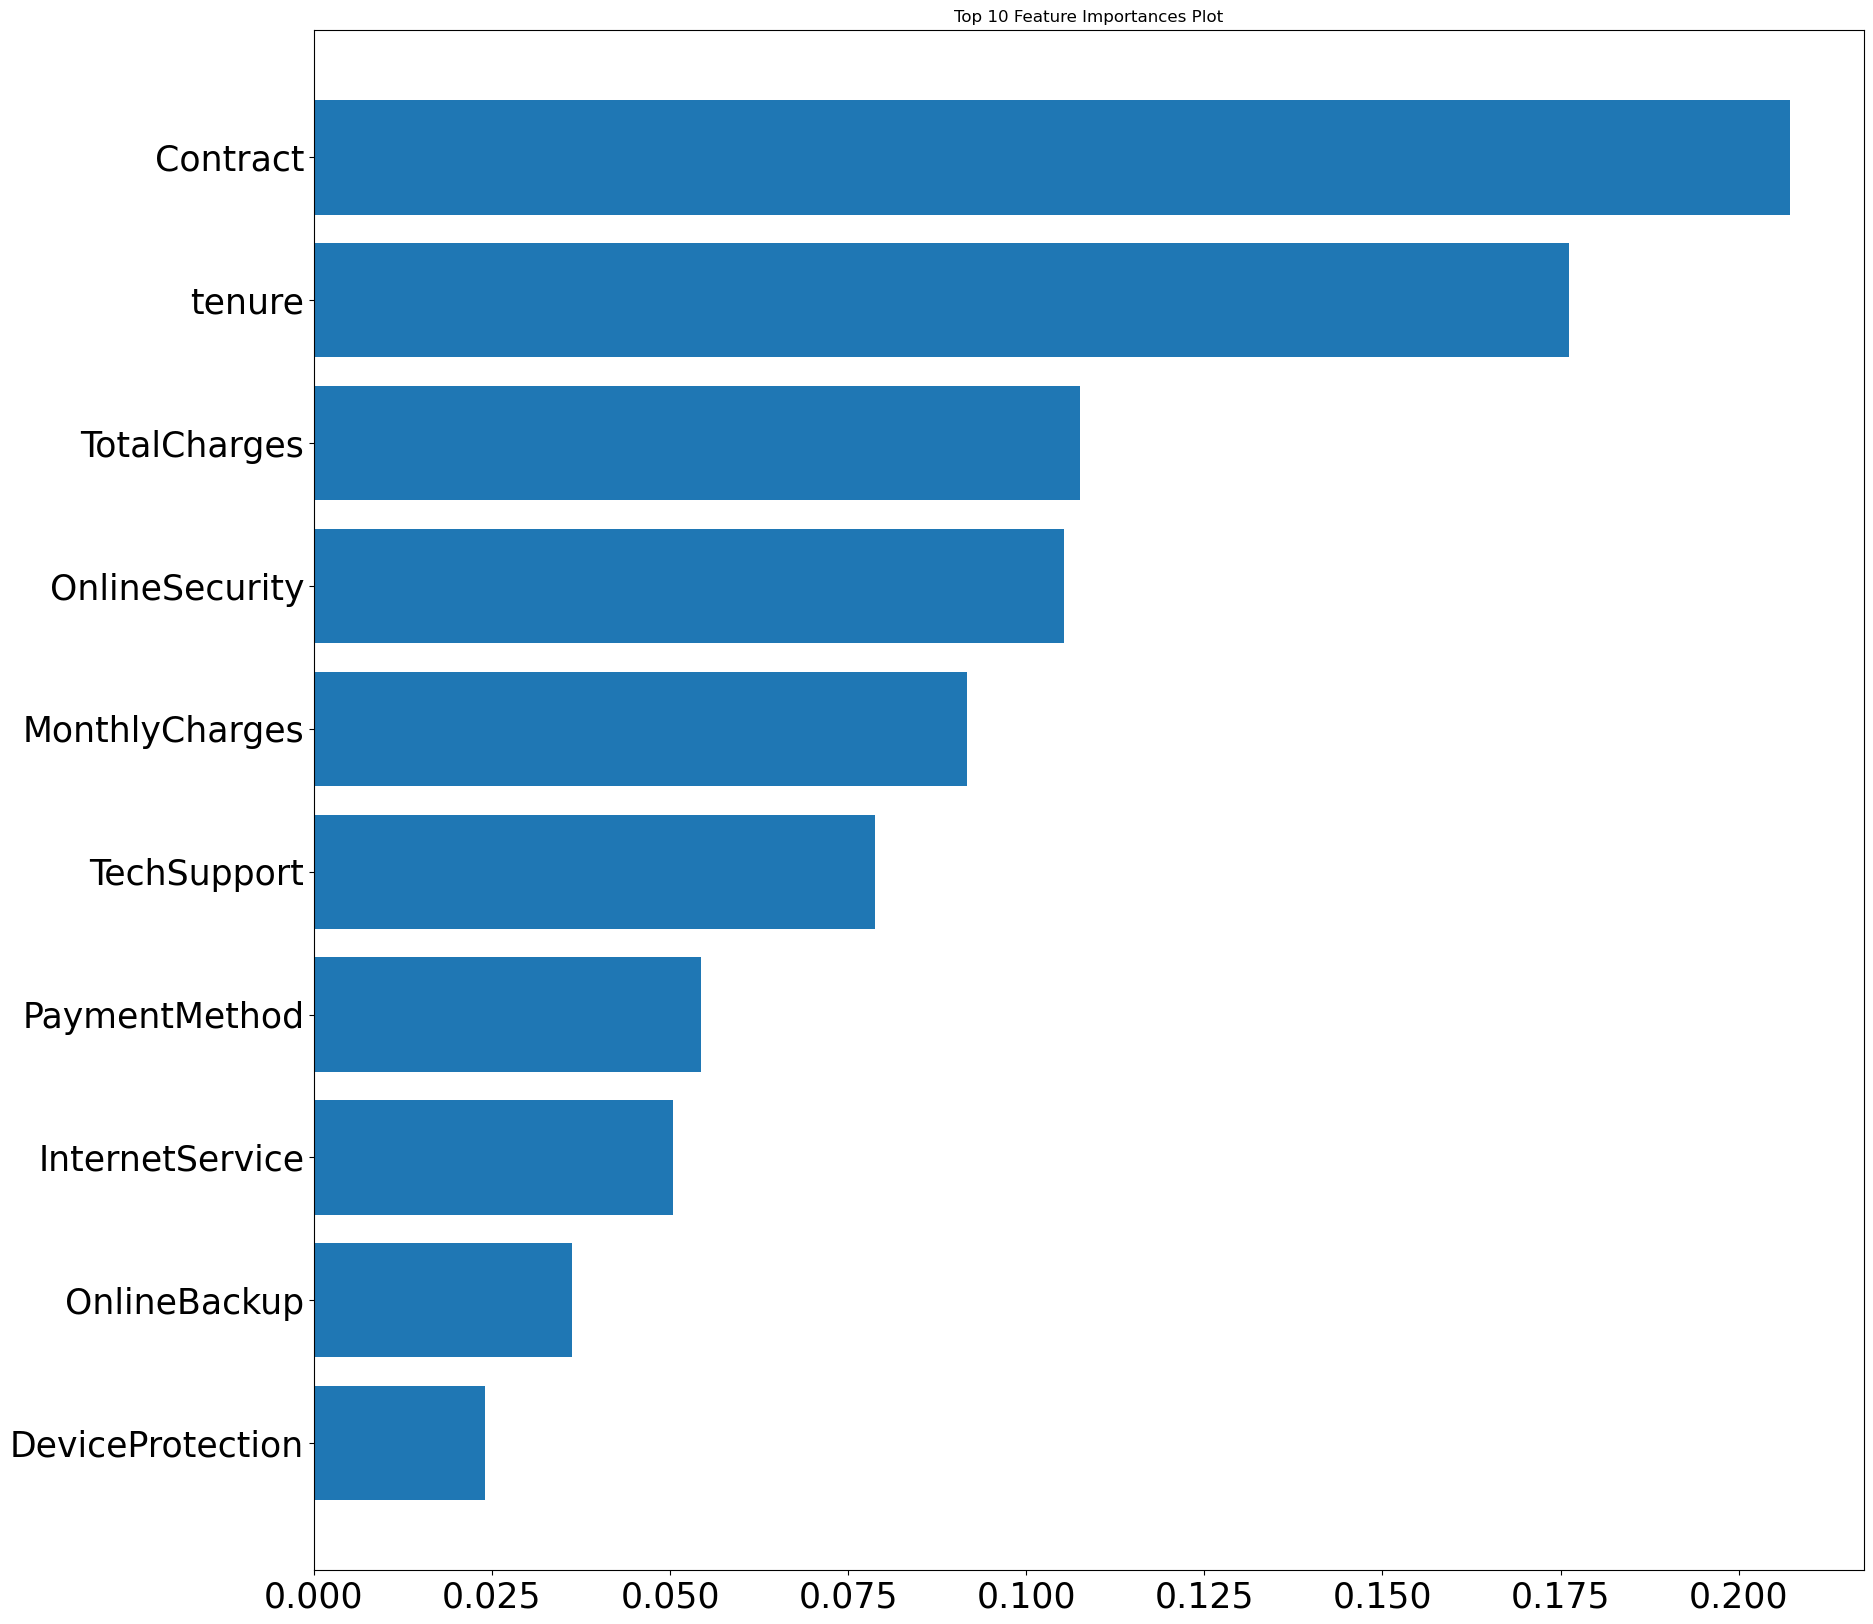

In [14]:
imps = randfor.feature_importances_
cols = X_train.columns
s_index = np.argsort(imps)[-10:]
s_cols = cols[s_index]
s_imp = imps[s_index]
plt.figure(figsize=(20,20))
plt.tick_params(labelsize=25)
plt.barh(s_cols, s_imp)
plt.title("Top 10 Feature Importances Plot")
plt.show()


# DecisionTreeClassifier

In [15]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Accuracy Score : 77.68
Precision Score : 59.41
Recall Score : 50.62
F-Score : 54.67


# ADA Boost

In [16]:
adaboo = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=2), learning_rate= 0.1, n_estimators= 200)
adaboo.fit(X_train,y_train)
preds = adaboo.predict(X_test)
print(classification_report(y_test,preds))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,preds)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,preds)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,preds)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,preds)*100,2)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy Score : 79.62
Precision Score : 64.65
Recall Score : 51.52
F-Score : 57.34


# XG Boost

In [17]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,preds)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,preds)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,preds)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,preds)*100,2)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.51      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Accuracy Score : 78.01
Precision Score : 60.17
Recall Score : 51.16
F-Score : 55.3


# Voting

In [18]:
# lor = LogisticRegression()
eclf1 = VotingClassifier(estimators=[('lor', logreg), ('randFor', randfor),('adamodel',adaboo)], voting='soft')
abc = eclf1.fit(X_train, y_train)

y_pred=eclf1.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.67      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy Score : 80.14
Precision Score : 66.99
Recall Score : 49.91
F-Score : 57.2


# SMOTE

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [20]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [21]:
# 5163+1869
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5983,1,0,1,1,65,1,1,0,1,1,1,0,0,1,1,0,3,72.45,4653.85
4473,1,0,1,0,42,0,2,0,1,0,0,0,1,0,0,1,2,40.15,1626.05
1040,1,0,1,1,32,1,0,1,0,0,0,0,0,0,0,1,2,69.75,2347.90
1076,0,0,1,1,3,1,0,1,0,0,0,0,0,0,0,1,0,69.55,200.20
6170,0,1,0,0,11,1,1,1,0,0,0,0,1,1,0,1,2,95.15,997.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,1,0,1,1,28,1,1,1,1,1,0,0,1,1,1,0,0,106.10,2847.40
4156,1,0,1,0,65,1,1,0,1,1,1,0,0,0,1,0,3,67.05,4309.55
5994,0,0,1,0,71,1,1,0,1,1,1,1,1,1,2,0,3,93.20,6506.15
4099,0,1,1,0,24,1,1,1,0,0,0,0,1,1,0,1,0,93.55,2264.05


In [22]:
# 7032*.3
7032*.1

703.2

In [23]:
# 1055 / 5163
703.2/1869,703.2/5163

(0.3762439807383628, 0.13619988378849507)

In [24]:
churn_yes=df[df['Churn']==1]

churn_no=df[df['Churn']==0]

In [25]:
churn_no

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,3,89.10,1949.40,0
7,0,0,0,0,10,0,2,0,1,0,0,0,0,0,0,0,1,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,0,0,0,0,72,1,0,2,2,2,2,2,2,2,2,1,2,21.15,1419.40,0
7027,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7028,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7029,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0


In [26]:
train_X, test_X= train_test_split(churn_yes, test_size=0.376, random_state=2022)

train_X_no, test_X_no= train_test_split(churn_no, test_size=0.136, random_state=2022)

X_train = pd.concat([train_X, train_X_no], axis=0)

X_test= pd.concat([test_X, test_X_no], axis=0)

In [27]:
from sklearn.utils import shuffle

X_train=shuffle(X_train, random_state=2022)
X_test= shuffle(X_test, random_state=2022)

In [28]:
y_train=X_train['Churn']
X_train.drop('Churn',axis=1, inplace=True)

y_test=X_test['Churn']
X_test.drop('Churn',axis=1, inplace=True)

In [29]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
324,1,0,0,0,69,0,2,0,1,1,0,1,1,1,2,1,2,60.05,4176.70
1375,1,0,1,1,61,1,0,1,0,1,0,1,1,1,1,1,2,98.45,6145.20
2892,1,0,0,0,43,1,1,2,2,2,2,2,2,2,2,0,2,26.45,1110.05
3124,1,0,1,0,70,1,1,1,0,1,1,0,1,0,1,1,2,95.00,6602.90
590,1,0,1,1,46,1,1,2,2,2,2,2,2,2,1,0,0,24.90,1174.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1,0,1,1,16,1,0,0,1,0,1,0,1,0,2,0,1,64.25,1024.00
3523,1,1,1,0,2,1,0,1,0,0,1,0,0,0,0,1,0,74.20,140.10
679,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,80.00,80.00
5192,0,0,1,1,70,1,1,1,0,1,1,0,1,1,1,1,0,106.50,7397.00


# OverSampling Using SMOTE

<AxesSubplot:title={'center':'after'}, ylabel='Churn'>

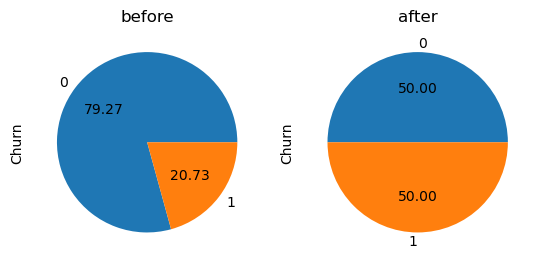

In [30]:
from imblearn.over_sampling import SMOTE

sampler1 = SMOTE(k_neighbors=3)
X_sm, y_sm = sampler1.fit_resample(X_train, y_train)
plt.subplot(1,2,1)
plt.title("before")
y_train.value_counts().plot.pie(autopct='%.2f')
plt.subplot(1,2,2)
plt.title("after")
y_sm.value_counts().plot.pie(autopct='%.2f')

# Logistic Regression

In [31]:
logreg = LogisticRegression(C= 0.01)
log_fit = logreg.fit(X_sm, y_sm)

# Make predictions
log_pred = log_fit.predict(X_test)
print(classification_report(y_test,log_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,log_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,log_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,log_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,log_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       703
           1       0.76      0.72      0.74       703

    accuracy                           0.75      1406
   macro avg       0.75      0.75      0.75      1406
weighted avg       0.75      0.75      0.75      1406

Accuracy Score : 75.04
Precision Score : 76.43
Recall Score : 72.4
F-Score : 74.36


# RandomForestClassifier After Smote

In [32]:
randFor=RandomForestClassifier(max_depth=14,n_estimators=351,bootstrap=True,random_state=2022, max_samples=800)
randFor.fit(X_sm, y_sm)

rand_pred=randFor.predict(X_test)

print(classification_report(y_test,rand_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,rand_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,rand_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,rand_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,rand_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       703
           1       0.78      0.65      0.70       703

    accuracy                           0.73      1406
   macro avg       0.74      0.73      0.73      1406
weighted avg       0.74      0.73      0.73      1406

Accuracy Score : 72.97
Precision Score : 77.61
Recall Score : 64.58
F-Score : 70.5


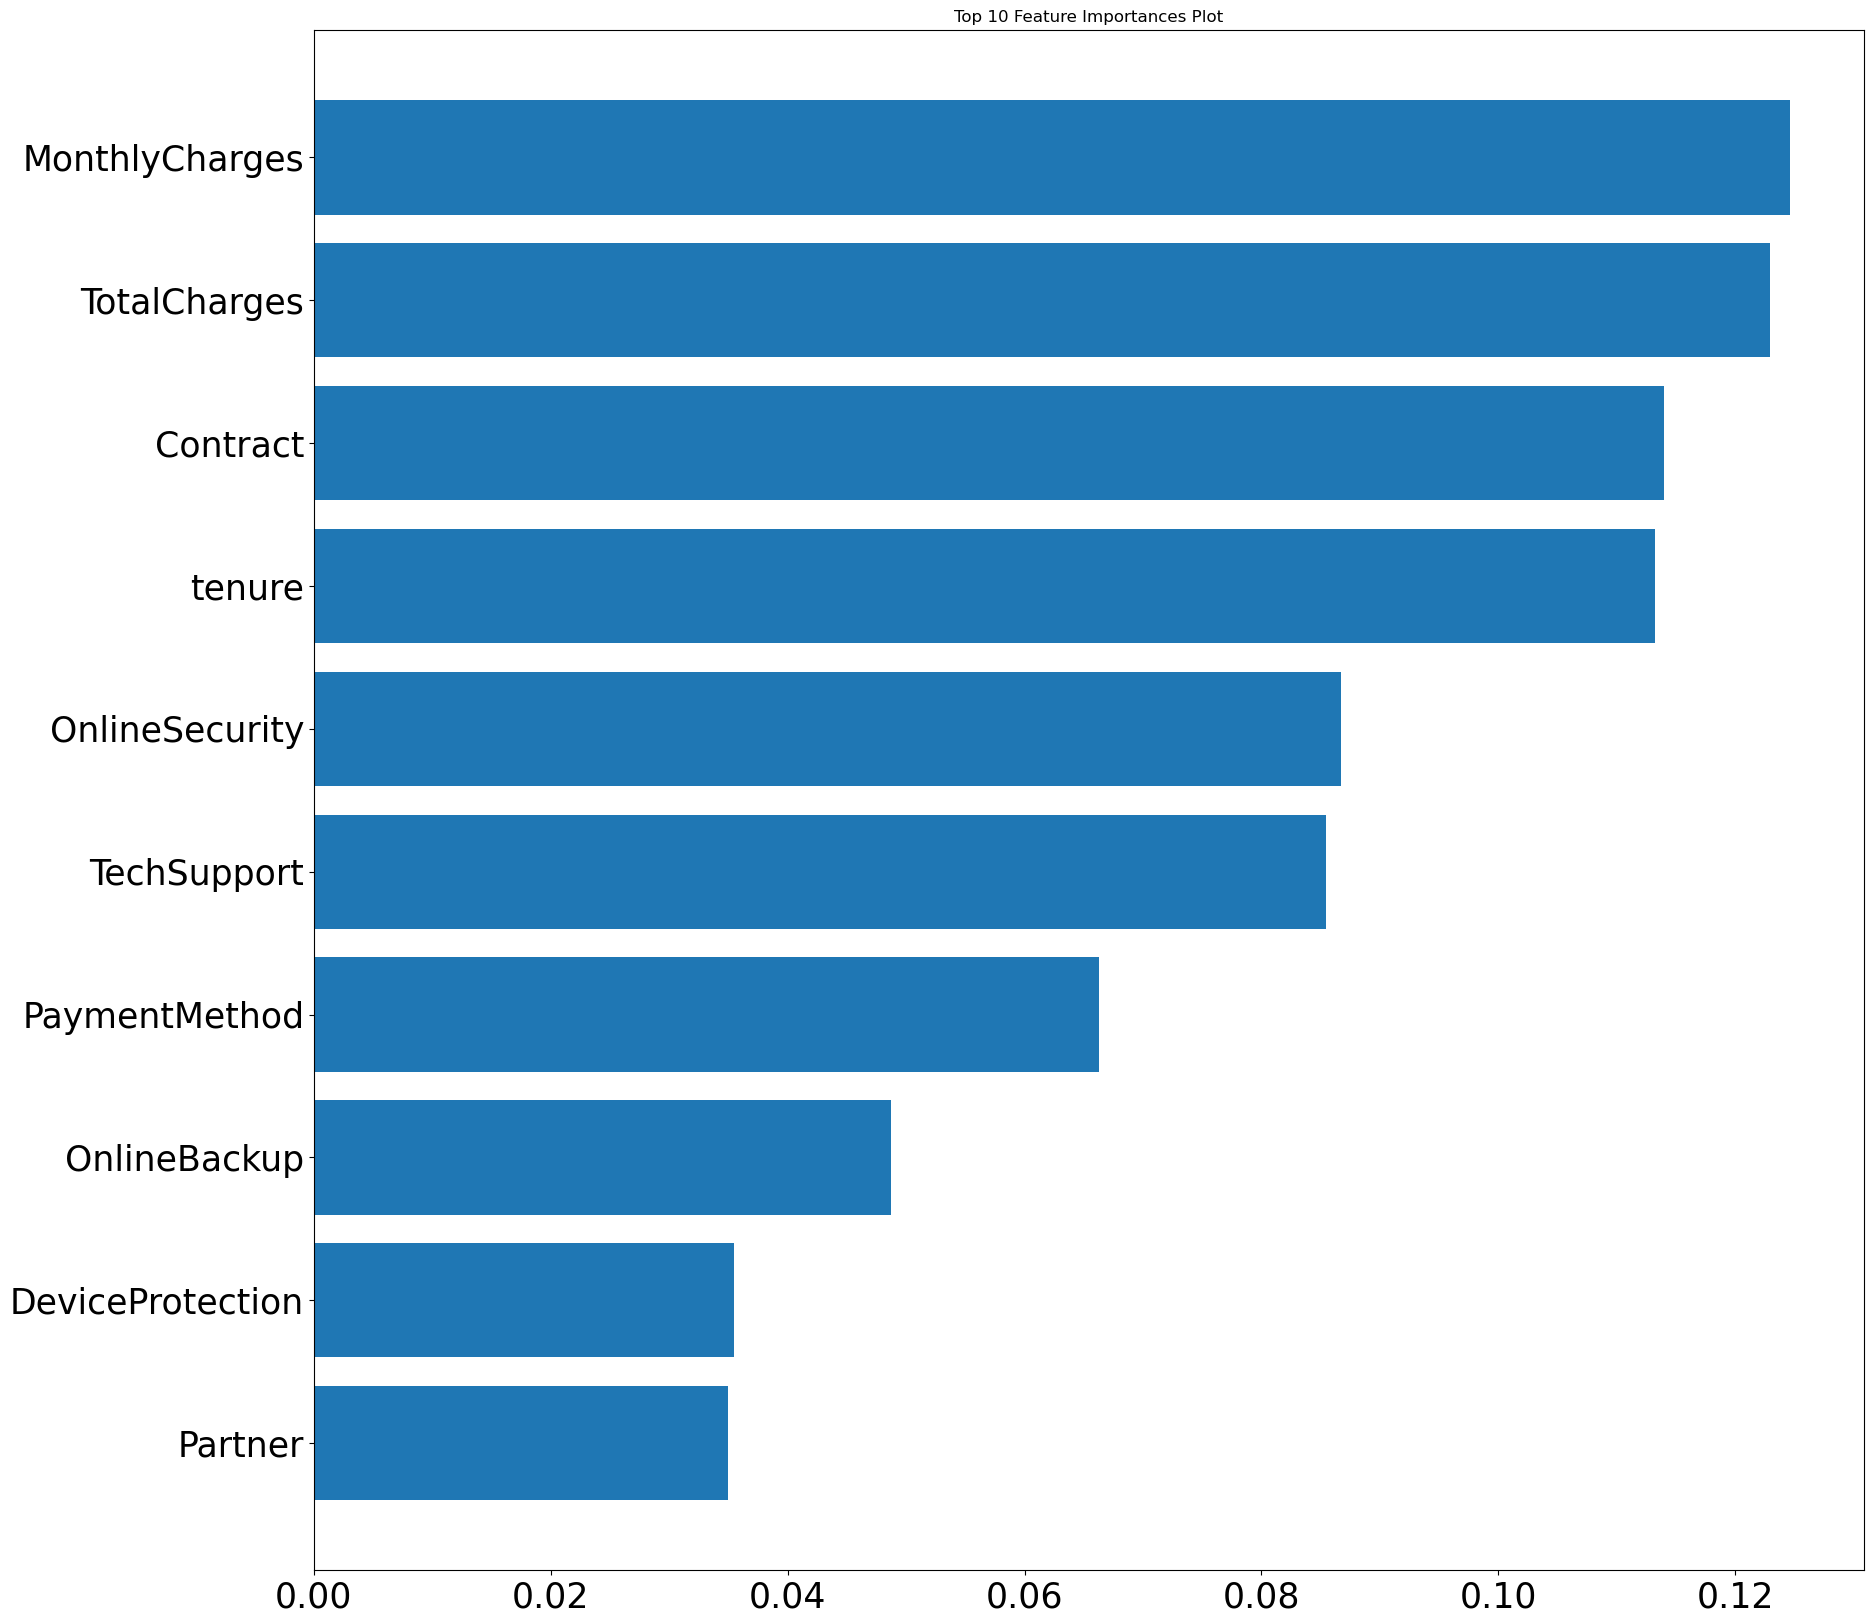

In [33]:
imps = randFor.feature_importances_
cols = X_sm.columns
s_index = np.argsort(imps)[-10:]
s_cols = cols[s_index]
s_imp = imps[s_index]
plt.figure(figsize=(20,20))
plt.tick_params(labelsize=25)
plt.barh(s_cols, s_imp)
plt.title("Top 10 Feature Importances Plot")
plt.show()


# XG Boost After SmoteE

In [34]:
xgmodel = XGBClassifier()
xgmodel.fit(X_sm, y_sm)
xg_pred = xgmodel.predict(X_test)
print(classification_report(y_test,xg_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,xg_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,xg_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,xg_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,xg_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       703
           1       0.78      0.52      0.62       703

    accuracy                           0.68      1406
   macro avg       0.71      0.68      0.68      1406
weighted avg       0.71      0.68      0.68      1406

Accuracy Score : 68.42
Precision Score : 77.73
Recall Score : 51.64
F-Score : 62.05


# DecisionTree After Smote

In [35]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(X_sm, y_sm)
dt_pred=dt.predict(X_test)
print(classification_report(y_test,dt_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,dt_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,dt_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,dt_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,dt_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       703
           1       0.75      0.69      0.72       703

    accuracy                           0.73      1406
   macro avg       0.73      0.73      0.73      1406
weighted avg       0.73      0.73      0.73      1406

Accuracy Score : 72.83
Precision Score : 74.65
Recall Score : 69.13
F-Score : 71.79


# AdaBoostClassifier

In [36]:
randFor=RandomForestClassifier(max_depth=10,n_estimators=401,bootstrap=True,random_state=2022, max_samples=2000)

adamodel = AdaBoostClassifier(base_estimator=randFor, n_estimators=25, learning_rate = 0.1)
adamodel.fit(X_sm, y_sm)

ada_pred=adamodel.predict(X_test)

print(classification_report(y_test,ada_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,ada_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,ada_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,ada_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,ada_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       703
           1       0.78      0.62      0.69       703

    accuracy                           0.72      1406
   macro avg       0.73      0.72      0.72      1406
weighted avg       0.73      0.72      0.72      1406

Accuracy Score : 72.4
Precision Score : 78.38
Recall Score : 61.88
F-Score : 69.16


# Voting Classifier

In [37]:
lor = LogisticRegression()
eclf1 = VotingClassifier(estimators=[('lor', lor), ('randFor', randFor),('adamodel',adamodel)], voting='soft')
abc = eclf1.fit(X_sm, y_sm)

vc_pred=eclf1.predict(X_test)

print(classification_report(y_test,vc_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,vc_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,vc_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,vc_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,vc_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       703
           1       0.77      0.67      0.72       703

    accuracy                           0.74      1406
   macro avg       0.74      0.74      0.74      1406
weighted avg       0.74      0.74      0.74      1406

Accuracy Score : 73.68
Precision Score : 77.43
Recall Score : 66.86
F-Score : 71.76


# SMOTETomek

<AxesSubplot:title={'center':'after'}, ylabel='Churn'>

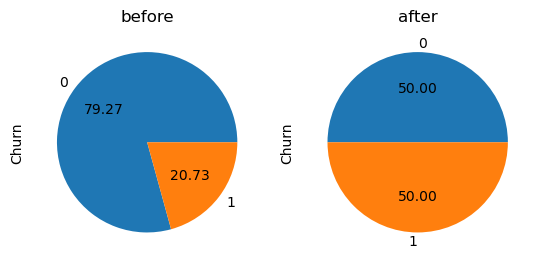

In [38]:
# # sampler1 = SMOTE(k_neighbors=3)
# from imblearn.combine import SMOTEENN
# sampler1 = SMOTEENN()
from imblearn.combine import SMOTETomek
sampler1 = SMOTETomek(random_state=42)
X_smt, y_smt = sampler1.fit_resample(X_train, y_train)
plt.subplot(1,2,1)
plt.title("before")
y_train.value_counts().plot.pie(autopct='%.2f')
plt.subplot(1,2,2)
plt.title("after")
y_sm.value_counts().plot.pie(autopct='%.2f')

# LogisticRegression

In [39]:
logreg = LogisticRegression(C= 0.01)
log_fit = logreg.fit(X_smt, y_smt)

# Make predictions
log_pred = log_fit.predict(X_test)
print(classification_report(y_test,log_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,log_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,log_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,log_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,log_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       703
           1       0.76      0.74      0.75       703

    accuracy                           0.75      1406
   macro avg       0.75      0.75      0.75      1406
weighted avg       0.75      0.75      0.75      1406

Accuracy Score : 75.32
Precision Score : 76.1
Recall Score : 73.83
F-Score : 74.95


In [40]:
# filename = 'LogisticRegression'
# pickle.dump(log_fit, open(filename, 'wb'))

# RandomForestClassifier After SmoteTomek

In [41]:
randFor=RandomForestClassifier(max_depth=14,n_estimators=351,bootstrap=True,random_state=2022, max_samples=800)
randFor.fit(X_smt, y_smt)

y_pred=randFor.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       703
           1       0.78      0.66      0.71       703

    accuracy                           0.74      1406
   macro avg       0.74      0.74      0.73      1406
weighted avg       0.74      0.74      0.73      1406

Accuracy Score : 73.54
Precision Score : 77.54
Recall Score : 66.29
F-Score : 71.47


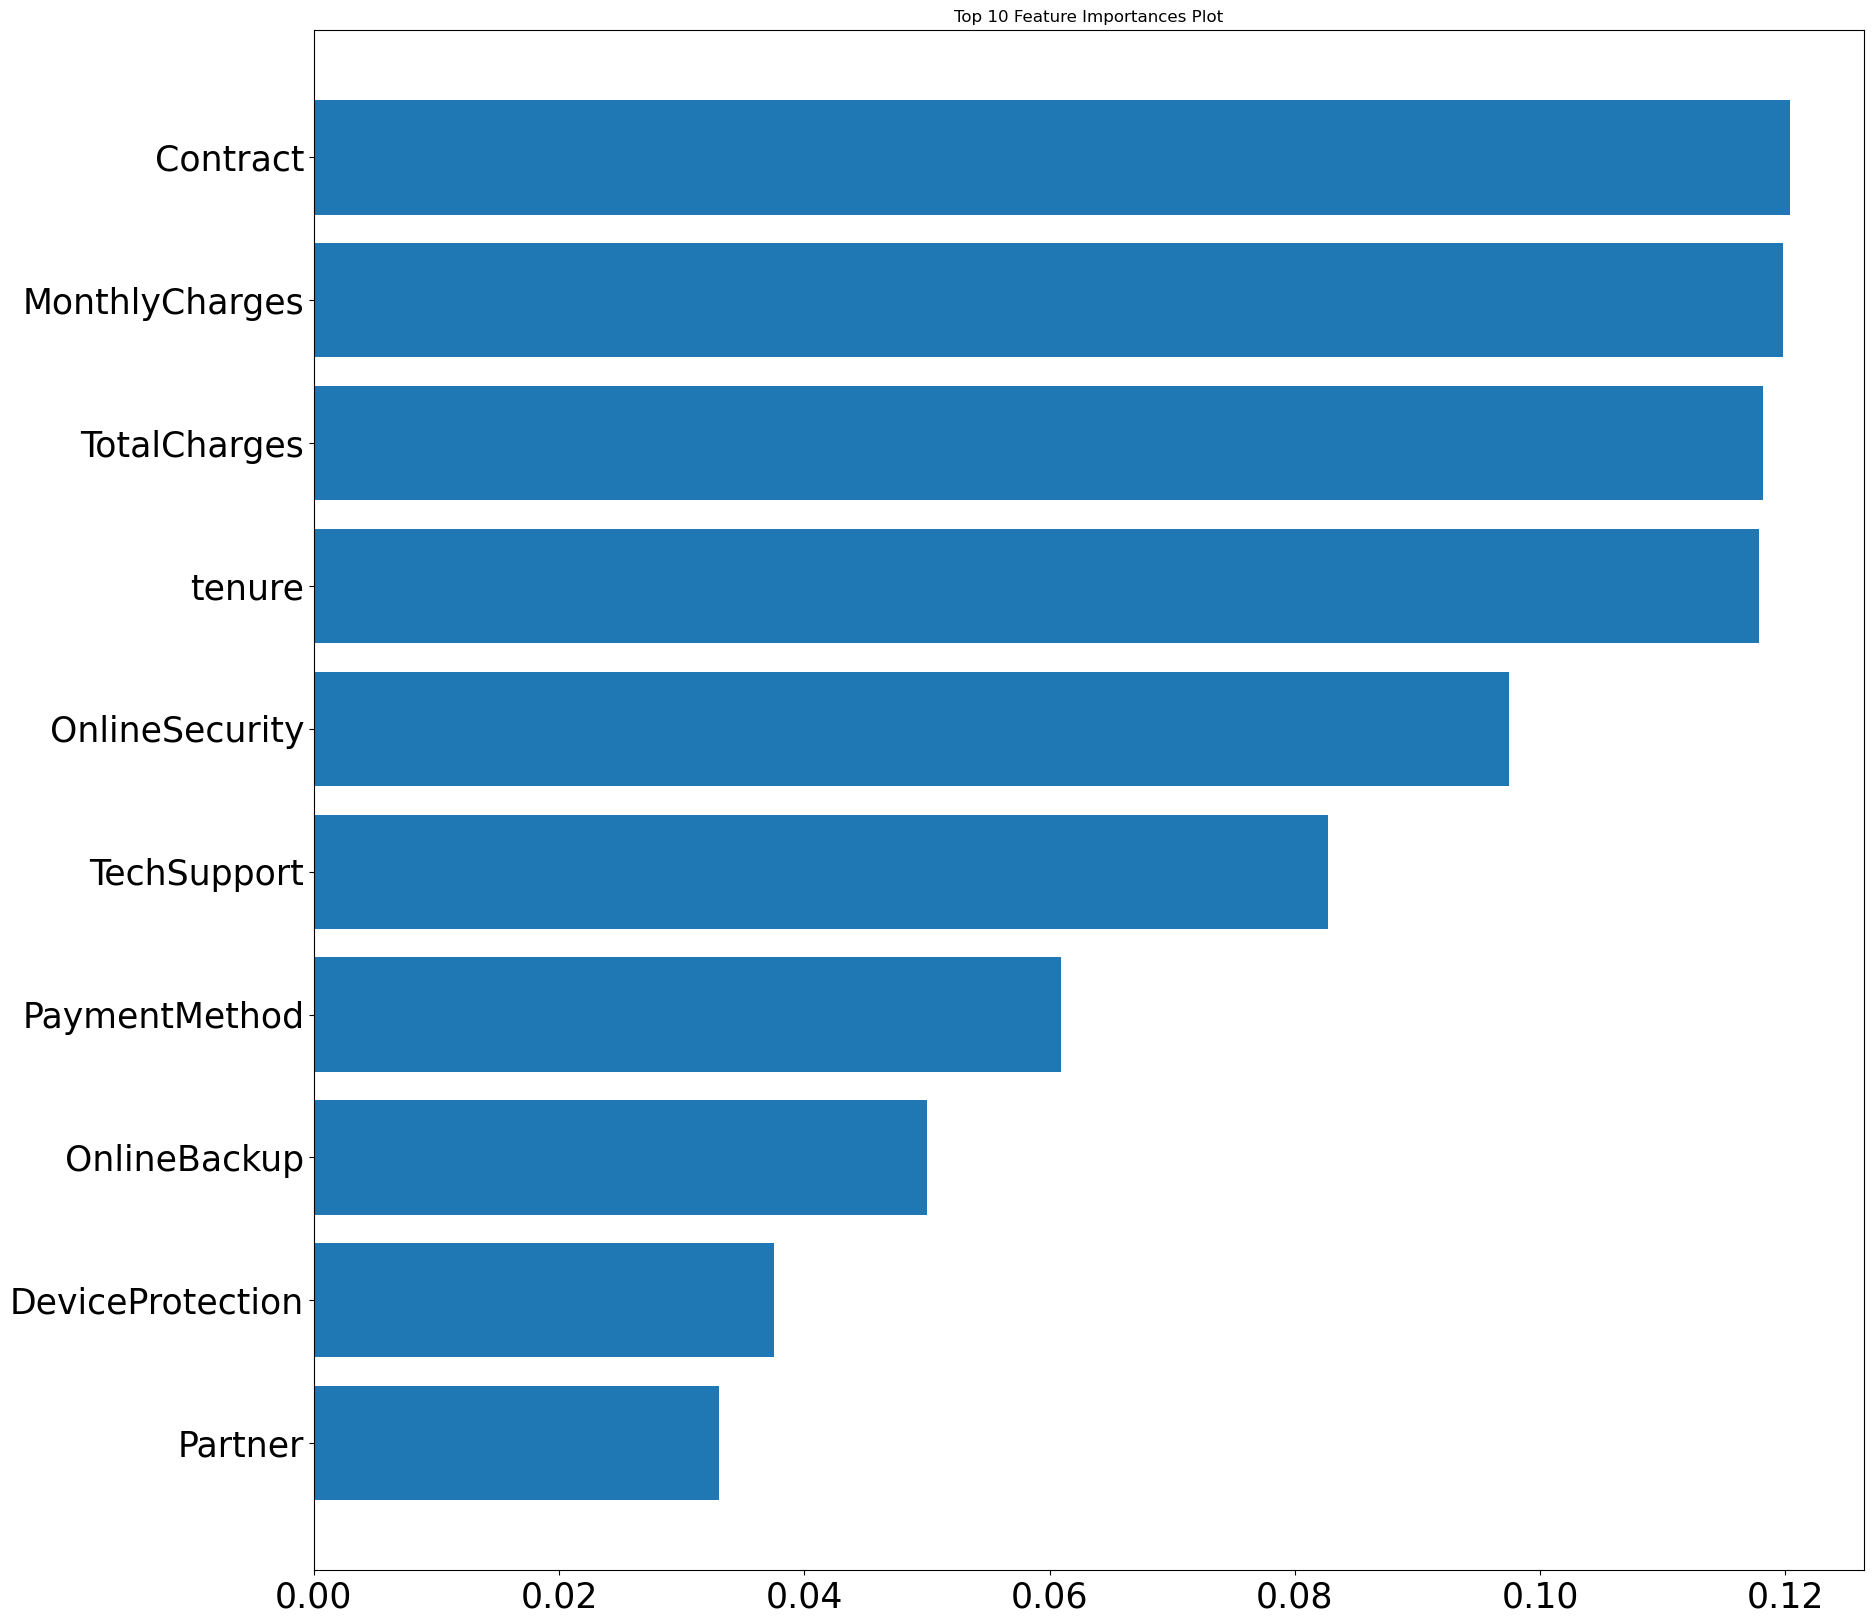

In [42]:
imps = randFor.feature_importances_
cols = X_smt.columns
s_index = np.argsort(imps)[-10:]
s_cols = cols[s_index]
s_imp = imps[s_index]
plt.figure(figsize=(20,20))
plt.tick_params(labelsize=25)
plt.barh(s_cols, s_imp)
plt.title("Top 10 Feature Importances Plot")
plt.show()


# XG Boost After SmoteTomek

In [43]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_smt, y_smt)
preds = model.predict(X_test)
print(classification_report(y_test,preds))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,preds)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,preds)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,preds)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,preds)*100,2)))

              precision    recall  f1-score   support

           0       0.66      0.86      0.74       703
           1       0.79      0.55      0.65       703

    accuracy                           0.70      1406
   macro avg       0.72      0.70      0.70      1406
weighted avg       0.72      0.70      0.70      1406

Accuracy Score : 70.34
Precision Score : 79.42
Recall Score : 54.91
F-Score : 64.93


# DecisionTree After SmoteTomek

In [44]:
dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
dt.fit(X_smt, y_smt)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       703
           1       0.75      0.65      0.70       703

    accuracy                           0.72      1406
   macro avg       0.72      0.72      0.72      1406
weighted avg       0.72      0.72      0.72      1406

Accuracy Score : 71.69
Precision Score : 74.96
Recall Score : 65.15
F-Score : 69.71


# AdaBoostClassifier

In [45]:
# randFor=RandomForestClassifier(max_depth=10,n_estimators=401,bootstrap=True,random_state=2022, max_samples=2000)

adamodel = AdaBoostClassifier(base_estimator=randFor, n_estimators=25, learning_rate = 0.1)
adamodel.fit(X_smt, y_smt)

ada_pred=adamodel.predict(X_test)

print(classification_report(y_test,ada_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,ada_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,ada_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,ada_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,ada_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       703
           1       0.77      0.68      0.72       703

    accuracy                           0.74      1406
   macro avg       0.74      0.74      0.74      1406
weighted avg       0.74      0.74      0.74      1406

Accuracy Score : 73.83
Precision Score : 76.97
Recall Score : 67.99
F-Score : 72.21


In [46]:
# filename = 'AdaBoostClassifier'
# pickle.dump(ada_pred, open(filename, 'wb'))

# VotingClassifier

In [47]:
lor = LogisticRegression()
eclf1 = VotingClassifier(estimators=[('lor', lor), ('randFor', randFor),('adamodel',adamodel)], voting='soft')
abc = eclf1.fit(X_sm, y_sm)

y_pred=eclf1.predict(X_test)

print(classification_report(y_test,y_pred))
print('Accuracy Score : ' + str(round(accuracy_score(y_test,y_pred)*100,2)))
print('Precision Score : ' + str(round(precision_score(y_test,y_pred)*100,2)))
print('Recall Score : ' + str(round(recall_score(y_test,y_pred)*100,2)))
print('F-Score : ' + str(round(f1_score(y_test,y_pred)*100,2)))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       703
           1       0.77      0.68      0.72       703

    accuracy                           0.74      1406
   macro avg       0.74      0.74      0.74      1406
weighted avg       0.74      0.74      0.74      1406

Accuracy Score : 74.11
Precision Score : 77.38
Recall Score : 68.14
F-Score : 72.47


In [48]:
# filename = 'VotingClassifier'
# pickle.dump(abc, open(filename, 'wb'))

In [49]:
# X_sm

In [50]:
import pickle

In [51]:
# filename = 'votingClass'
# pickle.dump(abc, open(filename, 'wb'))

In [52]:
# import pickle
# load_model = pickle.load(open('votingClass', 'rb'))
# model_score_r1 = load_model.score(X_sm, y_sm)
# model_score_r1

In [53]:
# import pickle as pkl
# filename1 = 'Mavi'
# pkl.dump(model_rf,open('Mavi','wb'))
# cls=pkl.load(open('Mavi','rb'))
# cls.predict(X_test)